In [179]:
import pandas as pd
import numpy as np
import importlib
import util.Data as data_util
import util.DataframeProcess as df_proc
import seaborn as sn
import matplotlib.pyplot as plt

In [180]:
importlib.reload(data_util)
importlib.reload(df_proc)

<module 'util.DataframeProcess' from 'D:\\scul\\uaic-ub\\licenta\\code\\util\\DataframeProcess.py'>

# Data

In [181]:
csv_filename = r'../data_db/final_coordinates-conversion-v2.csv'
df_main = data_util.import_data(csv_filename)

In [182]:
df_data = df_main.copy()
df_data.shape

(1827, 26)

In [183]:
df_data['title'].unique().size

61

## Split wm and rest

In [184]:
df_data = df_main.copy()
mask_wm = df_data['keywords'].str.contains('working memory')

### Working Memory

In [185]:
df_wm = df_data[mask_wm]

In [186]:
df_wm['title'].unique().size

17

In [187]:
df_wm_proc = df_proc.df_process(df_wm)
df_wm_proc.head(1)

,title,author,Number of Foci,Number of Subjects,contrast_set,keywords_split
0,A Rapid fMRI Task Battery for Mappin...,Drobyshevsky et al,13,31,{2-back > 0-back},"{talairach, fMRI, visual letters, wo..."


### Contrast wm

In [188]:
list_contrast_wm = list(df_proc.list_of_sets_to_set(df_wm_proc, 'contrast_set'))
counter_contrast_wm = data_util.df_counter(df=df_wm_proc.explode('contrast_set'), column='contrast_set',
                                           set_keywords=list_contrast_wm, order=1)
counter_contrast_wm

{'>nan_values<': 0,
 'retrocue > precue': 1,
 '1-back > rest': 1,
 'sub-dif > frame-dif': 1,
 '1-back > 2-back': 1,
 '2-back > 1-back': 1,
 'n-back > control task': 1,
 'sub-dif > baseline': 1,
 'retrocue and precue': 1,
 'precue > retrocue': 1,
 'sub-id > baseline': 1,
 '3-back > 2-back > 1-back > 0-back': 2,
 '3-back > 0-back': 2,
 '-': 2,
 '2-back > 1-back > 0-back': 2,
 '2-back > 0-back': 6}

In [189]:
# chosen set of contrast
min_val = 1
list_contrast_selection_wm = list(set([key for key in list_contrast_wm if counter_contrast_wm[key] >= min_val]))
# create new col with only selected contrasts
df_wm_proc['selected_contrast'] = df_wm_proc['contrast_set'].apply(
    lambda x: set(x).intersection(list_contrast_selection_wm))

contrast_bool_wm = df_proc.boolean_df(df_wm_proc['selected_contrast'], list_contrast_selection_wm)
contrast_int_wm = contrast_bool_wm.astype(int)
contrast_freq_mat_wm = np.dot(contrast_int_wm.T, contrast_int_wm)

In [190]:
contrast_freq_wm = pd.DataFrame(contrast_freq_mat_wm, columns=list_contrast_selection_wm,
                                index=list_contrast_selection_wm)
# contrast_freq_wm

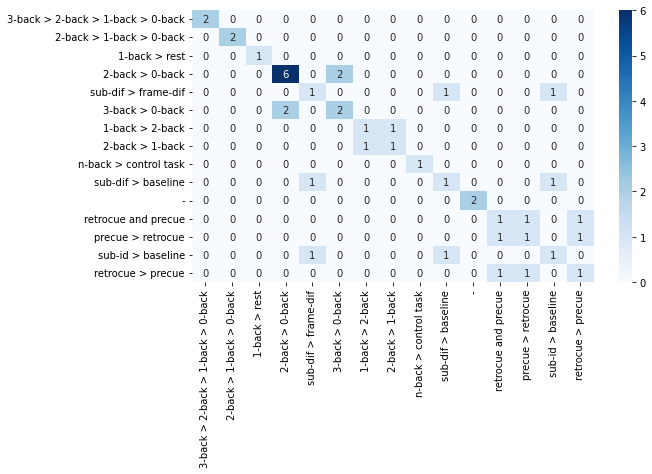

In [191]:
fig, ax = plt.subplots(figsize=(9, 5))
sn.heatmap(contrast_freq_wm, cmap="Blues",annot=True, fmt="d")
# plt.xticks(rotation=50)
plt.savefig("./images/heatmap_contrast_wm.png", dpi=300)

### Keywords wm

In [192]:
counter_keywords_wm = data_util.df_counter(df=df_wm_proc.explode('keywords_split'), column='keywords_split',
                                           set_keywords=df_proc.list_of_sets_to_set(df_wm_proc, 'keywords_split'),
                                           order=1)
counter_keywords_wm

{'>nan_values<': 0,
 'visual object': 1,
 'scrambled drawings': 1,
 'facial expression': 1,
 'visual identical shapes': 1,
 'precue': 1,
 'visual shape': 1,
 'retrocue': 1,
 'Sub-Id': 1,
 'experimental task': 1,
 'Sub-Dif': 1,
 'verbal pseudo-words': 1,
 'perceptual matching task': 1,
 'two and four choice reversal learning task': 1,
 'reversal learning task': 1,
 'visual shape color': 1,
 'reading': 1,
 'anticipation phase': 1,
 'visual spatial cue': 1,
 'negative reward': 1,
 'verbal': 1,
 'positive reward': 1,
 'visual faces': 1,
 'reward value': 1,
 'decision phase': 1,
 'three-back task': 2,
 'visual numbers': 2,
 'monetary reward': 2,
 'one-back task': 2,
 'visual word recognition': 2,
 'decision making': 3,
 'visual letters': 6,
 'two-back task': 7,
 'talairach': 7,
 'MNI': 10,
 'n-back task': 14,
 'fMRI': 17,
 'working memory': 17}

In [193]:
# chosen set of keywords
# list_keywords = list(df_proc.list_of_sets_to_set(df_wm_proc, 'keywords_split'))
list_keywords = [
    'Sub-Dif',
    'Sub-Id',
    'anticipation phase',
    'decision making',
    'decision phase',
    'facial expression',
    'monetary reward',
    'n-back task',
    'negative reward',
    'one-back task',
    'positive reward',
    'precue',
    'reading',
    'retrocue',
    'reward value',
    'scrambled drawings',
    'three-back task',
    'two and four choice reversal learning task',
    'two-back task',
    'verbal',
    'verbal pseudo-words',
    'visual faces',
    'visual letters',
    'visual numbers',
    'visual object',
    'visual shape',
    'visual shape color',
    'visual spatial cue',
    'visual word recognition']

In [194]:
# Filter the keywords based on min value of appearances
min_val = 2
list_keywords_selection_wm = list(set([key for key in list_keywords if counter_keywords_wm[key] >= min_val]))
# create new col with only selected keywords
df_wm_proc['selected_keywords'] = df_wm_proc['keywords_split'].apply(
    lambda x: set(x).intersection(list_keywords_selection_wm))

keywords_bool_wm = df_proc.boolean_df(df_wm_proc['selected_keywords'], list_keywords_selection_wm)
keywords_int_wm = keywords_bool_wm.astype(int)
keywords_freq_mat_wm = np.dot(keywords_int_wm.T, keywords_int_wm)

In [195]:
keywords_freq_wm = pd.DataFrame(keywords_freq_mat_wm, columns=list_keywords_selection_wm,
                                index=list_keywords_selection_wm)
# keywords_freq_wm

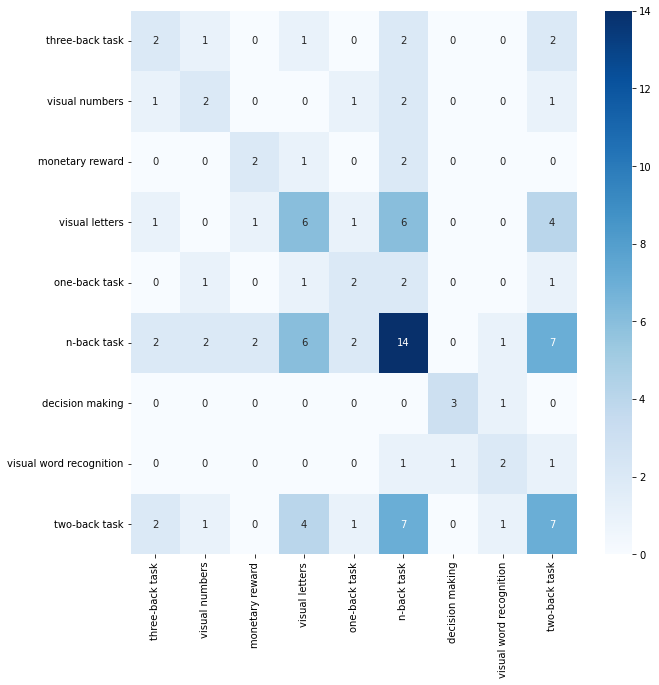

In [196]:
fig, ax = plt.subplots(figsize=(10, 10))
sn.heatmap(keywords_freq_wm, cmap="Blues",annot=True, fmt="d")
plt.savefig("./images/heatmap_keywords_wm.png", dpi=300)

### Keywords and Contrast wm

In [197]:
list_cnt_key_selection_wm = list_contrast_selection_wm + list_keywords_selection_wm
cnt_key_int_wm = pd.merge(contrast_int_wm, keywords_int_wm, left_index=True, right_index=True).astype(int)
cnt_key_freq_mat_wm = np.dot(cnt_key_int_wm.T, cnt_key_int_wm)

In [198]:
cnt_key_freq_wm = pd.DataFrame(cnt_key_freq_mat_wm, columns=list_cnt_key_selection_wm, index=list_cnt_key_selection_wm)

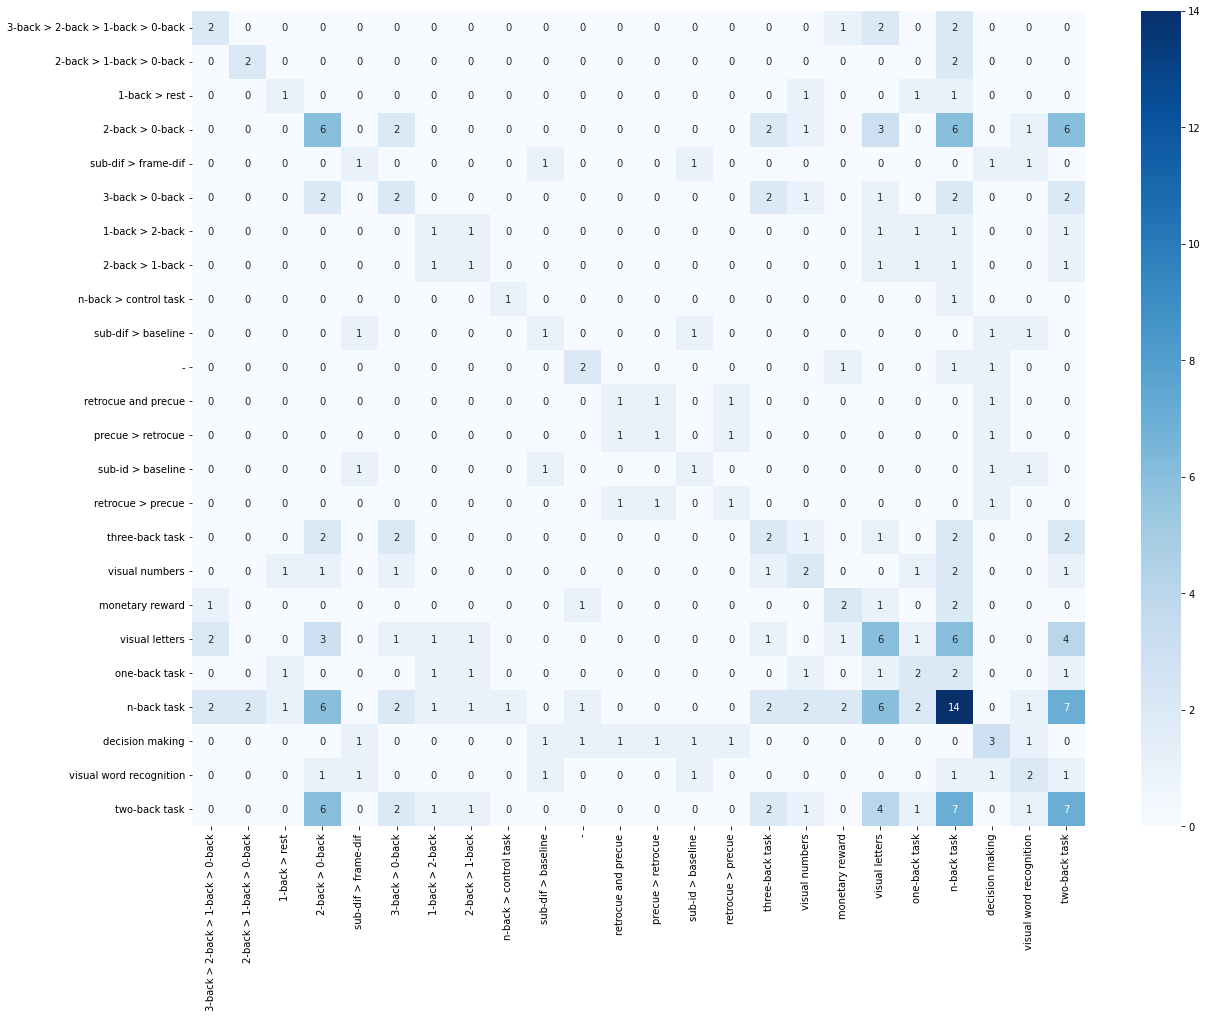

In [199]:
fig, ax = plt.subplots(figsize=(20, 15))
sn.heatmap(cnt_key_freq_wm, cmap="Blues",annot=True, fmt="d")
# plt.xticks(rotation=60)
plt.savefig("./images/heatmap_cnt_key_wm.png", dpi=300)

## Reward magnitude and type

In [200]:
df_reward = df_data[~mask_wm]

In [201]:
df_reward['title'].unique().size

46

In [202]:
df_reward_proc = df_proc.df_process(df_reward)
df_reward_proc.head(1)

,title,author,Number of Foci,Number of Subjects,contrast_set,keywords_split
0,A functional neuroimaging study of m...,Taylor et al,18,12,{-},"{fMRI, monetary reward, MNI, reward ..."


### Contrast reward

In [228]:
list_contrast_reward = list(df_proc.list_of_sets_to_set(df_reward_proc, 'contrast_set'))
counter_contrast_reward = data_util.df_counter(df=df_reward_proc.explode('contrast_set'), column='contrast_set',
                                           set_keywords=list_contrast_reward, order=1)
counter_contrast_reward

{'>nan_values<': 0,
 'social reward magnitude': 1,
 'small incentives > baseline': 1,
 'monetary reward > social reward': 1,
 'penalty during run of failure': 1,
 'average female > average male': 1,
 'large incentives > baseline': 1,
 'erotic reward > monetary reward': 1,
 'stroop block > baseline': 1,
 'win > lose and risk > safe': 1,
 'social reward > monetary reward': 1,
 'task switching > control task': 1,
 'high reward > high loss': 1,
 'l4 > l1': 1,
 'punishment > no reward': 1,
 'beautiful female > beautiful male': 1,
 'safe > risk': 1,
 'monetary reward magnitude': 1,
 'movement > no movement': 1,
 'low-calorie and high-calorie': 1,
 'reward > punishment': 1,
 'reward during run of success': 1,
 'monetary reward > faces reward': 1,
 'movement > no movement and reward > no reward': 1,
 'all w > all l': 1,
 'reward during run of success and penalty during run of failure': 1,
 'win after losing streak > w1': 1,
 'win modulation': 1,
 'lose > no reward': 1,
 'w1 > l1': 1,
 'w4 > w1

In [229]:
# chosen set of contrast
min_val = 4
list_contrast_selection_reward = list(set([key for key in list_contrast_reward if counter_contrast_reward[key] >= min_val]))
# create new col with only selected contrasts
df_reward_proc['selected_contrast'] = df_reward_proc['contrast_set'].apply(
    lambda x: set(x).intersection(list_contrast_selection_reward))

contrast_bool_reward = df_proc.boolean_df(df_reward_proc['selected_contrast'], list_contrast_selection_reward)
contrast_int_reward = contrast_bool_reward.astype(int)
contrast_freq_mat_reward = np.dot(contrast_int_reward.T, contrast_int_reward)

In [230]:
contrast_freq_reward = pd.DataFrame(contrast_freq_mat_reward, columns=list_contrast_selection_reward,
                                index=list_contrast_selection_reward)
# contrast_freq_reward

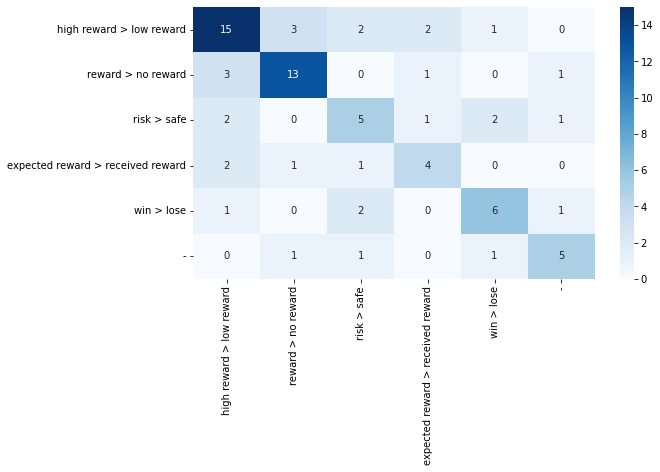

In [231]:
fig, ax = plt.subplots(figsize=(9, 5))
sn.heatmap(contrast_freq_reward, cmap="Blues",annot=True, fmt="d")
# plt.xticks(rotation=50)
plt.savefig("./images/heatmap_contrast_reward.png", dpi=300)


### Keywords reward

In [232]:
counter_keywords_reward = data_util.df_counter(df=df_reward_proc.explode('keywords_split'), column='keywords_split',
                                           set_keywords=df_proc.list_of_sets_to_set(df_reward_proc, 'keywords_split'),
                                           order=1)
counter_keywords_reward

{'>nan_values<': 0,
 'feedback reward': 1,
 'anova': 1,
 'visual color pies with probabilities': 1,
 'low calorie': 1,
 'movement': 1,
 'verbal reward': 1,
 'probability': 1,
 'visual shape color': 1,
 'young': 1,
 'potential gain': 1,
 'time effect': 1,
 'high incentive': 1,
 'extraversion': 1,
 'high calorie': 1,
 'dopamine': 1,
 'cups task': 1,
 'negative expectancy': 1,
 'small incentive': 1,
 'inhibition': 1,
 'visual cue': 1,
 'increasing activation': 1,
 'visual shape': 1,
 'conditioning task': 1,
 'safe choice': 1,
 'erotic reward': 1,
 'effect of reward': 1,
 'chocolate bars': 1,
 'positive expectancy': 1,
 'increasing reward uncertainty': 1,
 'potential loss': 1,
 'response maintenance': 1,
 'Stroop task': 1,
 'modelling prediction error': 1,
 'increasing reward magnitude': 1,
 'monetary and erotic reward': 1,
 'adult': 1,
 'reinforcement learning': 1,
 'fractal image': 1,
 'decreasing activation': 1,
 'time conditioning': 1,
 'response switching': 1,
 'high vs low calorie fo

### Obtain reduce list of keywords - rewards type

In [233]:
set_keywords_reward_type = set([el for el in df_proc.list_of_sets_to_set(df_reward_proc, 'keywords_split') if el.find('reward') != -1])
counter_keywords_reward_type = data_util.df_counter(df=df_reward_proc.explode('keywords_split'), column='keywords_split',
                                           set_keywords=set_keywords_reward_type,
                                           order=1)
counter_keywords_reward_type


{'>nan_values<': 0,
 'verbal reward': 1,
 'feedback reward': 1,
 'erotic reward': 1,
 'effect of reward': 1,
 'increasing reward magnitude': 1,
 'monetary and erotic reward': 1,
 'increasing reward uncertainty': 1,
 'food photo reward': 2,
 'taste reward': 2,
 'context-dependent reward': 3,
 'negative reward': 5,
 'social reward': 7,
 'positive reward': 11,
 'reward magnitude': 16,
 'reward value': 18,
 'monetary reward': 36}

### Check elements

In [234]:
############
check_set = ['reversal learning']
pd.set_option('display.max_colwidth', None)  # to show all the column values
mask = df_proc.check_column_elem(df=df_reward_proc,colummn_name='keywords_split',check_set=check_set)
df_reward_proc[mask]

,title,author,Number of Foci,Number of Subjects,contrast_set,keywords_split,selected_contrast,selected_keywords
13,Determining a Role for Ventromedial Prefrontal Cortex in Encoding Action-Based Value Signals During Reward-Related Decision Making,Glascher et al,20,20,"{ar switch > stay and sr switch > stay, ar; sr > neutral activity}","{fMRI, monetary reward, reinforcement learning, fractal image, MNI, task switching, reversal learning, decision making, outcome phase}",{},"{decision making, monetary reward, outcome phase}"
42,Role of the Medial Prefrontal Cortex in Impaired Decision Making in Juvenile Attention-Deficit-Hyperactivity Disorder,Hauser et al,12,20,{expected reward > received reward and control > adhd},"{visual object, fMRI, monetary reward, MNI, task switching, reversal learning, decision making, outcome phase}",{},"{decision making, monetary reward, outcome phase}"


In [235]:
pd.set_option('display.max_colwidth', 40)
#############

### Obtain reduce list of keywords

In [236]:
set_keywords = df_proc.list_of_sets_to_set(df_reward_proc, 'keywords_split').difference(set_keywords_reward_type)
set_keywords

{'Balloon Analog Risk Task',
 'MID',
 'MNI',
 'SID',
 'Stroop task',
 'adult',
 'anova',
 'anticipation phase',
 'chocolate bars',
 'conditioning task',
 'cups task',
 'decision making',
 'decision phase',
 'decreasing activation',
 'dopamine',
 'extraversion',
 'fMRI',
 'face stimuli',
 'food',
 'fractal image',
 'gambling',
 'high calorie',
 'high gain vs high loss',
 'high incentive',
 'high vs low calorie food',
 'increasing activation',
 'inhibition',
 'low calorie',
 'modelling prediction error',
 'movement',
 'n-back task',
 'negative expectancy',
 'outcome phase',
 'passive',
 'performance-dependent',
 'positive expectancy',
 'potential gain',
 'potential loss',
 'probability',
 'reinforcement learning',
 'response maintenance',
 'response switching',
 'reversal learning',
 'risk choice',
 'safe choice',
 'small incentive',
 'talairach',
 'task switching',
 'time conditioning',
 'time effect',
 'viewing',
 'visual cards',
 'visual color pies with probabilities',
 'visual cue',


In [237]:
set_reward_type = {
    'erotic reward',
    'verbal reward',
    'monetary and erotic reward',
    'feedback reward',
    'taste reward',
    'context-dependent reward',  # maybe get it out
    'social reward',
    'food photo reward',
    'monetary reward'}

set_reward_contingency = {
    # 'viewing',  ## should be where is passive
    'passive',
    'gambling',
    'performance-dependent',
    'reversal learning',
    'n-back task'  # check this
}

set_reward_phase = {
    'anticipation phase',
    'decision phase',
    'outcome phase',
}

set_reward_decision_making = {
    'decision making'
}

In [238]:
set_reward_influence = {
    'negative reward',
    'positive reward',
}
set_keywords_others = {
    'safe choice',
    'risk choice',
    'positive expectancy',
    'negative expectancy',
}

list_keywords_rewards = [set_reward_type,set_reward_contingency,set_reward_phase,set_reward_decision_making,set_reward_influence,set_keywords_others]
set_keywords_selection_reward = set().union(*list_keywords_rewards)
set_keywords_selection_reward

{'anticipation phase',
 'context-dependent reward',
 'decision making',
 'decision phase',
 'erotic reward',
 'feedback reward',
 'food photo reward',
 'gambling',
 'monetary and erotic reward',
 'monetary reward',
 'n-back task',
 'negative expectancy',
 'negative reward',
 'outcome phase',
 'passive',
 'performance-dependent',
 'positive expectancy',
 'positive reward',
 'reversal learning',
 'risk choice',
 'safe choice',
 'social reward',
 'taste reward',
 'verbal reward'}

In [239]:
# Filter the keywords based on min value of appearances
min_val = 5
list_keywords_selection_reward = list(set([key for key in set_keywords_selection_reward if counter_keywords_reward[key] >= min_val]))
# create new col with only selected keywords
df_reward_proc['selected_keywords'] = df_reward_proc['keywords_split'].apply(
    lambda x: set(x).intersection(list_keywords_selection_reward))

keywords_bool_reward = df_proc.boolean_df(df_reward_proc['selected_keywords'], list_keywords_selection_reward)
keywords_int_reward = keywords_bool_reward.astype(int)
keywords_freq_mat_reward = np.dot(keywords_int_reward.T, keywords_int_reward)

In [240]:
keywords_freq_reward = pd.DataFrame(keywords_freq_mat_reward, columns=list_keywords_selection_reward,
                                index=list_keywords_selection_reward)
# keywords_freq_reward

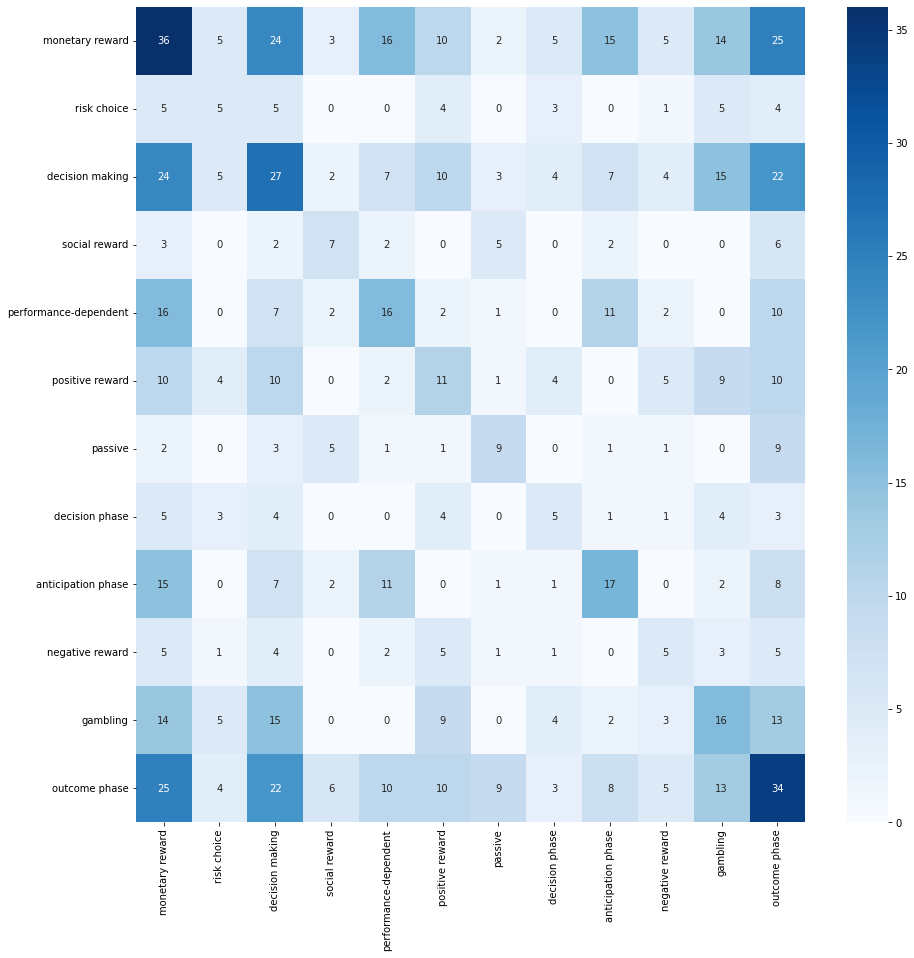

In [241]:
fig, ax = plt.subplots(figsize=(15, 15))
sn.heatmap(keywords_freq_reward, cmap="Blues",annot=True, fmt="d")
plt.savefig("./images/heatmap_keywords_reward.png", dpi=300)

### Keywords and Contrast reward

In [242]:
list_cnt_key_selection_reward = list_contrast_selection_reward + list(list_keywords_selection_reward)
cnt_key_int_reward = pd.merge(contrast_int_reward, keywords_int_reward, left_index=True, right_index=True).astype(int)
cnt_key_freq_mat_reward = np.dot(cnt_key_int_reward.T, cnt_key_int_reward)

In [243]:
cnt_key_freq_reward = pd.DataFrame(cnt_key_freq_mat_reward, columns=list_cnt_key_selection_reward, index=list_cnt_key_selection_reward)

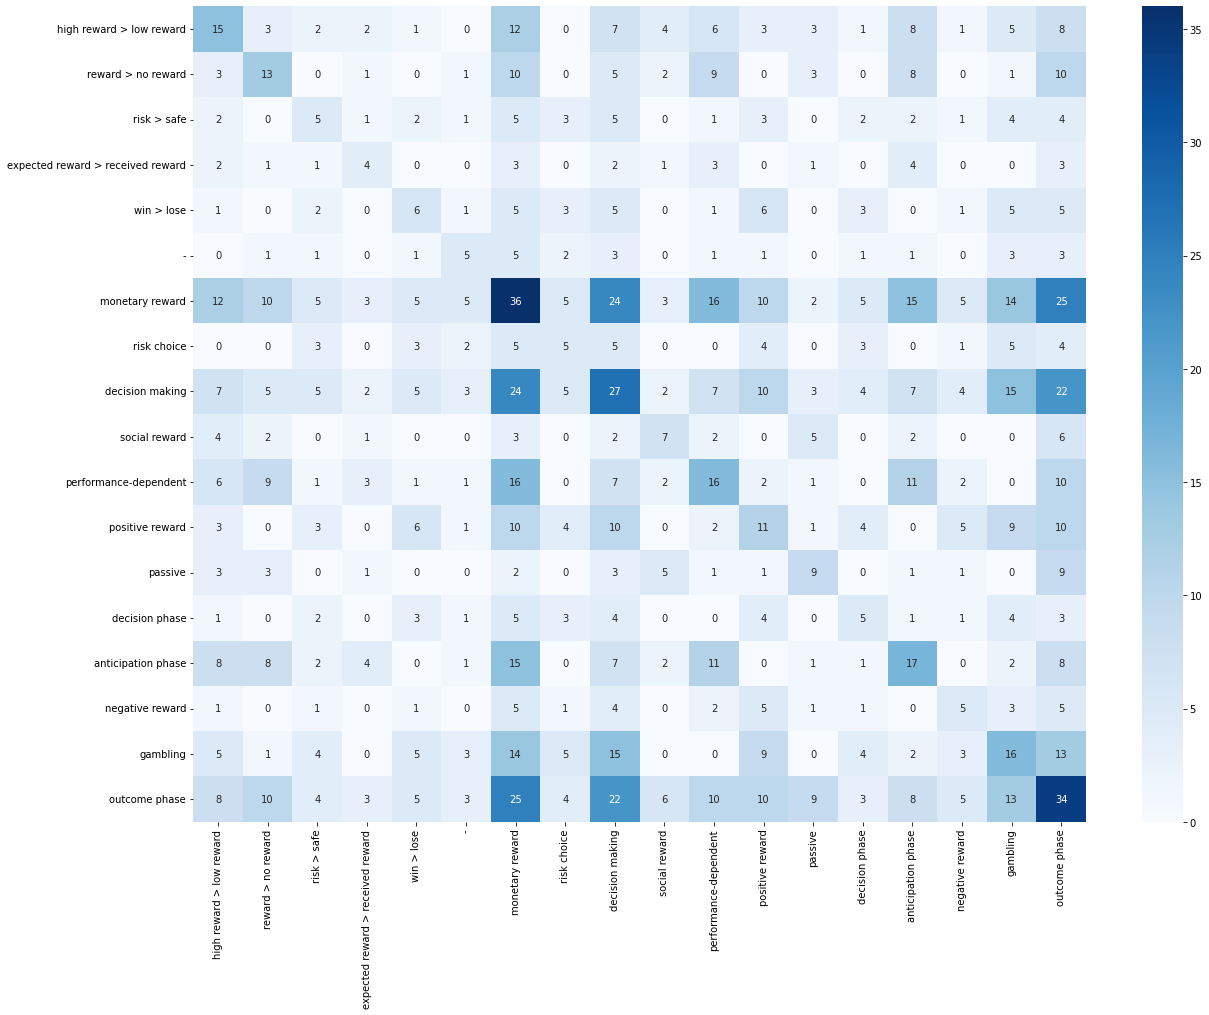

In [244]:
fig, ax = plt.subplots(figsize=(20, 15))
sn.heatmap(cnt_key_freq_reward, cmap="Blues",annot=True, fmt="d")
# plt.xticks(rotation=60)
plt.savefig("./images/heatmap_cnt_key_reward.png", dpi=300)